<a href="https://colab.research.google.com/github/xtianu/UPC_DAPR_2025/blob/main/S2/Exercise/Exercise_1_DataAnalysis_and_Clustering_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description

This week, both the theory and laboratory sessions are going to be virtual and asynchronous. It is not needed to do it at the class hours but I strongly recommend that you do so. All you should do is follow the instructions described in this Python Notebook and submit the resulting .ipynb file to the corresponding task in the ATENEA digital Campus https://atenea.upc.edu/ before next **Wednesday, September 26th at 15h**.

Please keep in mind that the main aim of this session is for you to learn, so if you are stuck or have any questions please don't hesitate contacting me at raul.benitez@upc.edu

#Task 1: Graphical Representation of data

a) Watch the following video decribing how to use Python and google colab:

https://www.youtube.com/watch?v=inN8seMm7UI

A Python notebook example using  in the video can be found in the GitHub repository of the course:

https://github.com/xtianu/UPC_DAPR_2025/blob/main/S2/S2.1_Data_Visualization.ipynb

b) Load one of the built-in databases from either seaborn or sklearn libraries (except iris, mpg or titanic). We recommend you to use some Kaggle datasets. You should use the following functions:

https://seaborn.pydata.org/generated/seaborn.load_dataset.html
https://scikit-learn.org/stable/datasets/toy_dataset.html

c) Create 4 different plots using matplotlib and/or seaborn libraries. Add a text cell describing the relevant aspects of the data that can be observed in each graph.





# Solution Task 1 🐧

In this notebook, we will analyze the **penguins** dataset from seaborn. We will create 4 different plots to explore key aspects of the data.

Dataset source: [Seaborn Penguins](https://seaborn.pydata.org/generated/seaborn.load_dataset.html)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
penguins = sns.load_dataset("penguins")
penguins.head()

## Plot 1: Histogram of flipper length

This histogram shows the distribution of **flipper length** across all penguins. We can observe that most penguins have flipper lengths around 190–220 mm, with some variability.

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(penguins["flipper_length_mm"], kde=True, bins=20)
plt.title("Distribution of Flipper Length (mm)")
plt.show()

## Plot 2: Scatterplot of body mass vs. flipper length

The scatterplot reveals a positive relationship between **flipper length** and **body mass**: penguins with longer flippers tend to weigh more. The different species also cluster in distinct regions of the plot.

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="body_mass_g", hue="species")
plt.title("Body Mass vs. Flipper Length")
plt.show()

## Plot 3: Boxplot of body mass by species

This boxplot compares the distribution of **body mass** across species. We can see that Gentoo penguins are generally heavier than Adelie and Chinstrap penguins.

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(data=penguins, x="species", y="body_mass_g")
plt.title("Body Mass by Species")
plt.show()

## Plot 4: Heatmap of correlations

The heatmap shows correlations between numerical variables. Strong positive correlations can be seen between **flipper length** and **body mass**, while bill length and bill depth are negatively correlated.

In [ ]:
plt.figure(figsize=(8,6))
corr = penguins.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

# Task 2: Clustering analysis

a) A Python notebook example using in the video can be found in the GitHub repository of the course:

https://github.com/xtianu/UPC_DAPR_2025/blob/main/S2/S2.2_Clustering%20analysis_PRML.ipynb

b) Load one of the built-in databases from either seaborn or sklearn libraries (except iris, mpg or titanic). Use Kaggle Artantica Penguin's dataset:

https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data


c) Apply k-means, agglomerative and GMM clustering methods to the Artantica Penguin's database and compare the results

1. Load dataset
2. Remove non-numerical columns and NaNs
3. Visualize numerical data
4. Compare k-means, agglomerative and GMM using Adjusted Rand Index
5. Conclusion

## Solution Task 2

Load dataset

In [1]:
import seaborn as sns
df = sns.load_dataset('penguins') # load data
df1 = df.dropna() # remove nans
df1.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Remove non-numerical columns and NaNs

In [2]:
df2 = df1.drop(columns=['species', 'island','sex']) # remove non-numerical variables
df2.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


# Visualize numerical data

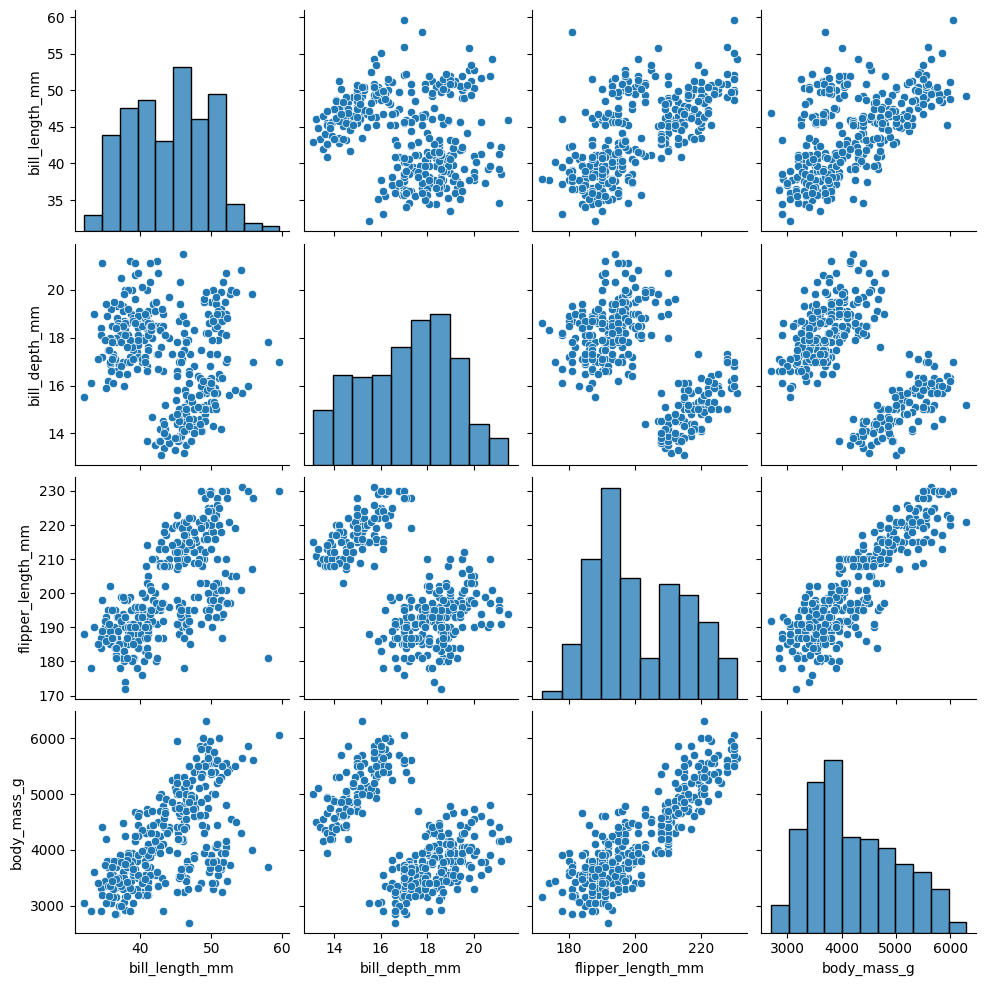

In [3]:
sns.pairplot(df2)

Compare k-means, agglomerative and GMM using Adjusted Rand Index

In [4]:
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import rand_score

kmeans_clust = KMeans(n_clusters=3).fit_predict(df2)
gmm_clust = mixture.GaussianMixture(n_components=2,covariance_type='full').fit_predict(df2)
agglo_clust = AgglomerativeClustering(n_clusters=3).fit_predict(df2)

rand_kmeans_sex = rand_score(df1['sex'].values,kmeans_clust)
rand_kmeans_species = rand_score(df1['species'].values,kmeans_clust)
rand_kmeans_island = rand_score(df1['island'].values,kmeans_clust)

rand_agglo_sex = rand_score(df1['sex'].values,agglo_clust)
rand_agglo_species = rand_score(df1['species'].values,agglo_clust)
rand_agglo_island = rand_score(df1['island'].values,agglo_clust)

rand_gmm_sex = rand_score(df1['sex'].values,gmm_clust)
rand_gmm_species = rand_score(df1['species'].values,gmm_clust)
rand_gmm_island = rand_score(df1['island'].values,gmm_clust)

print('SEX SCORE: kmeans = {}, agglo = {}, gmm ={}'.format(rand_kmeans_sex,rand_agglo_sex,rand_gmm_sex))
print('SPECIES SCORE: kmeans = {}, agglo = {}, gmm ={}'.format(rand_kmeans_species,rand_agglo_species,rand_gmm_species))
print('ISLAND SCORE: kmeans = {}, agglo = {}, gmm ={}'.format(rand_kmeans_island,rand_agglo_island,rand_gmm_island))


SEX SCORE: kmeans = 0.5599334274033069, agglo = 0.5601505119577409, gmm =0.49853467925757083
SPECIES SCORE: kmeans = 0.6856977459387098, agglo = 0.7261116538224972, gmm =0.820398711964977
ISLAND SCORE: kmeans = 0.6086870002532653, agglo = 0.6506205000180904, gmm =0.6653822497195991


- Best similarity between clustering and SEX is obtained with the Agglomerative clustering algorithm
- Best similarity between clustering and SPECIES is obtained with the GMM clustering algorithm
- Best similarity between clustering and ISLAND is obtained with the GMM clustering algorithm
